# Tesla Stock Analysis + Prediction 

## Tesla Introduction

Tesla, Inc. is an American multinational automotive and clean energy company headquartered in Austin, Texas. Tesla designs and manufactures electric vehicles (electric cars and trucks), battery energy storage from home to grid-scale, solar panels and solar roof tiles, and related products and services. Tesla is one of the world's most valuable companies and is, as of 2023, the world's most valuable automaker. In 2021, the company had the most worldwide sales of battery electric vehicles and plug-in electric vehicles, capturing 21% of the battery-electric (purely electric) market and 14% of the plug-in market (which includes plug-in hybrids). Through its subsidiary Tesla Energy, the company develops and is a major installer of photovoltaic systems in the United States. Tesla Energy is also one of the largest global suppliers of battery energy storage systems, with 3.99 gigawatt-hours (GWh) installed in 2021.


https://en.wikipedia.org/wiki/Tesla,_Inc.


## Prompts:
1. What are some of the less obvious factors that are correlated with the TESLA stock price? 
*   Employee numbers 
*   Tweets frequency of CEO Elon Musk
      
2. What could be the future behaviour of Tesla? 

# Load datasets

In [ ]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.dates import DateFormatter
%matplotlib inline

In [ ]:
import plotly as plt
import plotly.graph_objs as go 
from plotly.offline import iplot
from plotly.subplots import make_subplots

In [ ]:
tesla_data = pd.read_csv("drive/MyDrive/tech_data/TSLA.csv")
tesla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


In [ ]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3148 non-null   object 
 1   Open       3148 non-null   float64
 2   High       3148 non-null   float64
 3   Low        3148 non-null   float64
 4   Close      3148 non-null   float64
 5   Adj Close  3148 non-null   float64
 6   Volume     3148 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 172.3+ KB


In [ ]:
tesla_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3.148000e+03
mean,58.859467,60.174863,57.401019,58.805222,58.805222,9.351647e+07
std,95.677282,97.873400,93.192851,95.544413,95.544413,8.164780e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,8.983167,9.149833,8.770333,8.969000,8.969000,4.231478e+07
50%,16.229000,16.491000,15.945000,16.222334,16.222334,7.591425e+07
75%,24.611501,25.073334,24.142667,24.442667,24.442667,1.172809e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [ ]:
tesla_data["Date"] = pd.to_datetime(tesla_data['Date'])

In [ ]:
tesla_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Explorotary Data Analysis (EDA)

<AxesSubplot:xlabel='Date'>

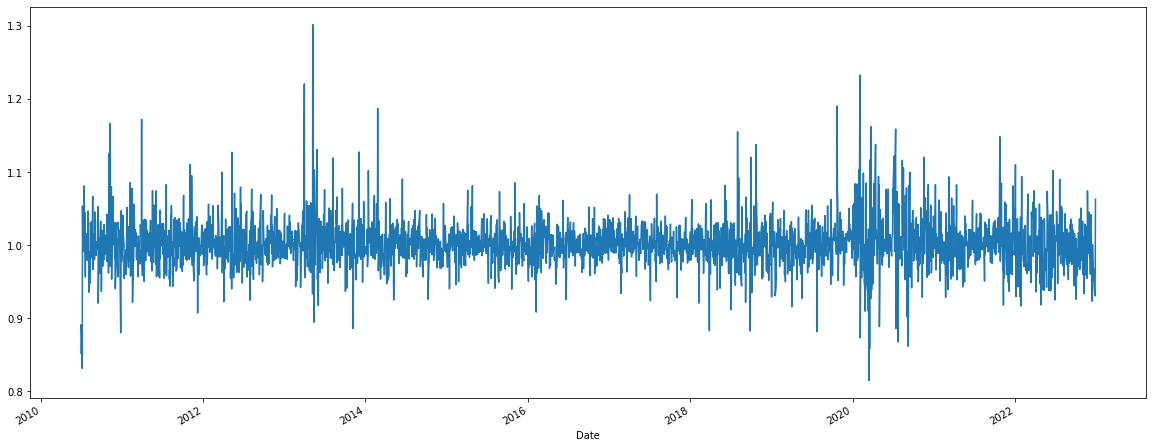

In [ ]:
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data.set_index('Date', inplace=True)
tesla_data['Change'] = tesla_data.High.div(tesla_data.High.shift())
tesla_data['Change'].plot(figsize=(20,8))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

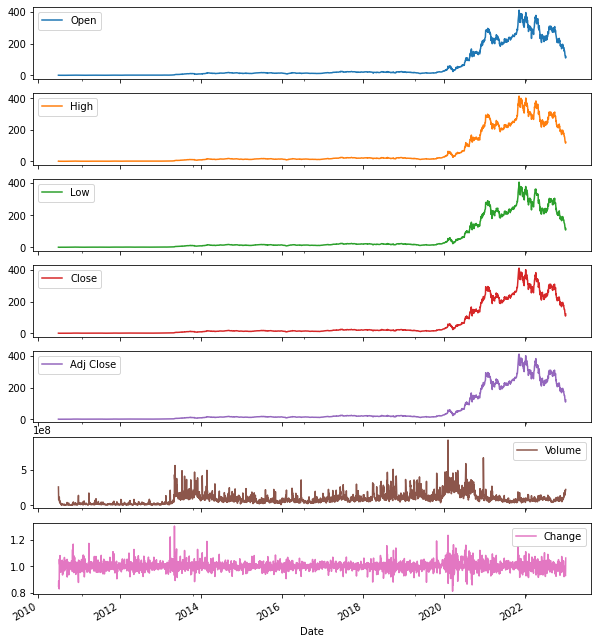

In [ ]:
tesla_data.plot(subplots=True, figsize=(10,12))

## OHLC Chart

In [ ]:
trace = go.Ohlc(x=tesla_data.index,
                open=tesla_data.Open,
                high=tesla_data.High,
                low=tesla_data.Low,
                close=tesla_data.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

Telsa price 

<AxesSubplot:xlabel='Date'>

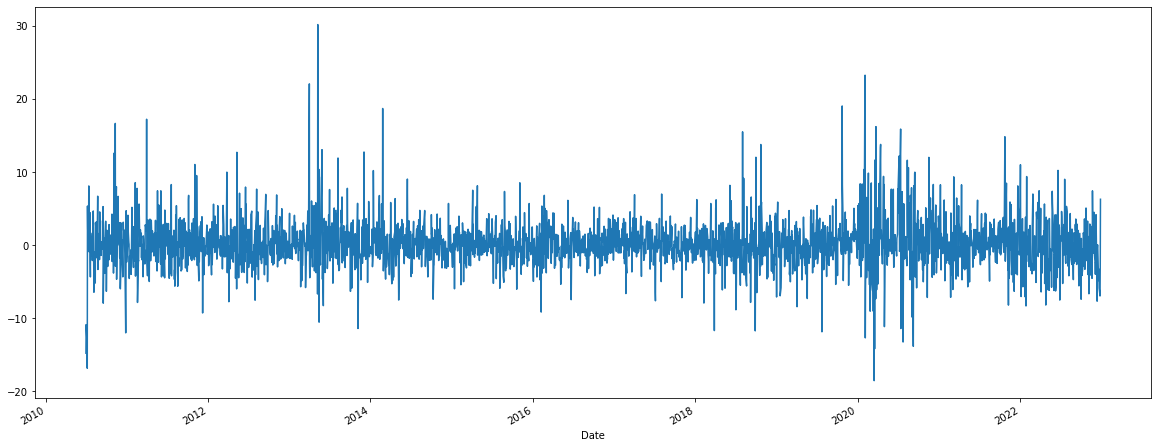

In [ ]:
tesla_data['Return'] = tesla_data.Change.sub(1).mul(100)
tesla_data['Return'].plot(figsize=(20,8))

In [ ]:
layout = go.Layout(
    title="Tesla Stock Prices",
    xaxis=dict(
        title="Date",
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color="#709054"
        )
    ),
    yaxis=dict(
        title="Stock Price",
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color="#800000"
        )
    ),
)

tsla_data = [{'x':tesla_data.index,'y':tesla_data['Close']}]
plot = go.Figure(data=tsla_data,layout=layout)
iplot(plot)

# Tesla price vs employee numbers




In [ ]:
tesla_emp_data = pd.read_csv("drive/MyDrive/tech_data/TSLA_employee.csv")
tesla_emp_data.columns = ['date', 'number']
tesla_emp_data.head()

,date,number
0,31/12/2023,128290
1,31/12/2022,127855
2,31/12/2021,99290
3,31/12/2020,70757
4,31/12/2019,48016


In [ ]:
tesla_emp_data["date"] = pd.to_datetime(tesla_emp_data['date'])
tesla_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    14 non-null     datetime64[ns]
 1   number  14 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 352.0 bytes


In [ ]:
layout = go.Layout(
    title="Tesla Stock Prices",
    xaxis=dict(
        title="Date",
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color="#709054"
        )
    ),
    yaxis=dict(
        title="Stock Price",
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color="#800000"
        )
    ),
)

tsla_data = [{}]
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=tesla_data.index,y=tesla_data['Close'], name="Stock Price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=tesla_emp_data['date'], y=tesla_emp_data['number'], name="Number of Employees"),
    secondary_y=True,
)

fig.update_yaxes(title_text="<b>Number</b> of employees", secondary_y=False)
fig.update_yaxes(title_text="<b>Stock</b> Price", secondary_y=True)

fig.show()

# Tesla Price vs. Elon Musk's tweet frequency

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
elon_tweet_data = pd.read_csv("drive/MyDrive/tech_data/elon_musk_tweets.csv")
elon_tweet_data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False


In [ ]:
elon_tweet_data["date"] = pd.to_datetime(elon_tweet_data['date'])
elon_tweet_data.sort_values(by='date', inplace=True)
elon_tweet_data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
8,1544316752657629189,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 13:46:20+00:00,@historydefined While bleak posts maybe genera...,NaN,Twitter for iPhone,2347,47623,False
7,1544320280247549954,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 14:00:21+00:00,@TonyadeVitti @historydefined His success was ...,NaN,Twitter for iPhone,171,3196,False
6,1544330849927270408,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 14:42:21+00:00,@slashdot It’s time,NaN,Twitter for iPhone,1537,31194,False
5,1544374564255309826,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:36:03+00:00,I must confess to a penchant for creative socks,NaN,Twitter for iPhone,4839,97004,False
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False


In [ ]:
tweet_freq = elon_tweet_data.groupby(elon_tweet_data.date.dt.normalize())['text'].count()
tweet_freq.columns = ['date', 'number']
tweet_freq

date
2022-07-05 00:00:00+00:00     9
2022-07-06 00:00:00+00:00    13
2022-07-07 00:00:00+00:00    19
2022-07-08 00:00:00+00:00    11
2022-07-11 00:00:00+00:00    10
                             ..
2023-03-08 00:00:00+00:00    12
2023-03-09 00:00:00+00:00    21
2023-03-10 00:00:00+00:00    10
2023-03-11 00:00:00+00:00    29
2023-03-12 00:00:00+00:00     3
Name: text, Length: 246, dtype: int64

In [ ]:
layout = go.Layout(
    title="Elon Tweet Frequency",
    xaxis=dict(
        title="Date",
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color="#709054"
        )
    ),
    yaxis=dict(
        title="Number of Tweets",
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color="#800000"
        )
    ),
)

twt_data = [{'x':tweet_freq.index,'y':tweet_freq.values}]
plot = go.Figure(data=twt_data,layout=layout)
iplot(plot)

In [ ]:
start_date = tweet_freq.index[0].tz_localize(None)
end_date = tweet_freq.index[-1].tz_localize(None)
print(start_date,end_date)
mask = (tesla_data.index > start_date) & (tesla_data.index <= end_date)

tesla_ranged_stock_data = tesla_data.loc[mask]
tesla_ranged_stock_data

2022-07-05 00:00:00 2023-03-12 00:00:00


,Open,High,Low,Close,Adj Close,Volume,Change,Return
Date,,,,,,,,
2022-07-06,230.779999,234.563339,227.186661,231.733337,231.733337,71853600,1.006076,0.607631
2022-07-07,233.919998,245.363327,232.210007,244.543335,244.543335,81930600,1.046043,4.604295
2022-07-08,242.333328,254.979996,241.160004,250.763336,250.763336,101854200,1.039194,3.919359
2022-07-11,252.103333,253.063339,233.626663,234.343338,234.343338,99241200,0.992483,-0.751689
2022-07-12,236.846664,239.773331,228.369995,233.070007,233.070007,87930900,0.947483,-5.251653
...,...,...,...,...,...,...,...,...
2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300,0.967224,-3.277637
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,0.941374,-5.862556
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,0.930415,-6.958480


In [ ]:
ranged_tweet_data = tweet_freq.loc[tweet_freq.index.year==2022]
ranged_tweet_data

date
2022-07-05 00:00:00+00:00     9
2022-07-06 00:00:00+00:00    13
2022-07-07 00:00:00+00:00    19
2022-07-08 00:00:00+00:00    11
2022-07-11 00:00:00+00:00    10
                             ..
2022-12-27 00:00:00+00:00    15
2022-12-28 00:00:00+00:00    34
2022-12-29 00:00:00+00:00     5
2022-12-30 00:00:00+00:00    47
2022-12-31 00:00:00+00:00    17
Name: text, Length: 175, dtype: int64

In [ ]:
ranged_tweet_data.index = ranged_tweet_data.index.tz_localize(None)
merged_df = tesla_ranged_stock_data.merge(ranged_tweet_data,left_index=True, right_index=True)merged_df

,Open,High,Low,Close,Adj Close,Volume,Change,Return,text
2022-07-06,230.779999,234.563339,227.186661,231.733337,231.733337,71853600,1.006076,0.607631,13
2022-07-07,233.919998,245.363327,232.210007,244.543335,244.543335,81930600,1.046043,4.604295,19
2022-07-08,242.333328,254.979996,241.160004,250.763336,250.763336,101854200,1.039194,3.919359,11
2022-07-11,252.103333,253.063339,233.626663,234.343338,234.343338,99241200,0.992483,-0.751689,10
2022-07-12,236.846664,239.773331,228.369995,233.070007,233.070007,87930900,0.947483,-5.251653,15
...,...,...,...,...,...,...,...,...,...
2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300,0.967224,-3.277637,19
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,0.941374,-5.862556,29
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,0.930415,-6.958480,15
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,0.971589,-2.841147,34




## Split into Training and Test Data

In [ ]:
X = merged_df['Adj Close'].values.reshape(-1, 1)
Y = merged_df['text']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = 100)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(85, 1)
(37, 1)
(85,)
(37,)


In [ ]:
y_train.value_counts(normalize = True)*100

11    8.235294
3     5.882353
7     5.882353
1     5.882353
12    4.705882
6     4.705882
5     4.705882
15    4.705882
16    4.705882
27    3.529412
23    3.529412
4     3.529412
25    3.529412
10    3.529412
8     3.529412
20    2.352941
17    2.352941
14    2.352941
9     2.352941
31    2.352941
2     2.352941
18    2.352941
22    2.352941
19    1.176471
34    1.176471
28    1.176471
36    1.176471
57    1.176471
24    1.176471
37    1.176471
13    1.176471
32    1.176471
Name: text, dtype: float64

In [ ]:
y_test.value_counts(normalize = True)*100

3     13.513514
14     8.108108
4      8.108108
7      5.405405
8      5.405405
12     5.405405
19     5.405405
5      5.405405
39     5.405405
20     5.405405
6      5.405405
9      2.702703
21     2.702703
30     2.702703
55     2.702703
17     2.702703
37     2.702703
29     2.702703
10     2.702703
25     2.702703
58     2.702703
Name: text, dtype: float64

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr_test_preds = lr.predict(X_test)
lr_test_preds

array([ 9.94864392,  8.41312201, 25.23423082, 15.09197092, 14.49312876,
       23.75049906,  8.25466445, 18.28168443,  8.07528762, 15.33582915,
       15.01994544, 19.40322823,  6.36210341, 19.08425781,  7.03434324,
        7.40236004,  7.4418026 , 17.62727859,  9.57582588, 19.48245701,
        7.8472051 ,  6.62619625,  9.66945673, 18.67268187, 25.00786447,
        8.26289772,  6.58263721, 20.63795604, 16.81338686,  8.59935992,
       14.74521871, 18.25801922,  8.02281066, 19.0554476 , 13.51563591,
        6.13916435,  8.7523286 ])

In [ ]:
lr_train_preds_score = lr.score(X_train,y_train)
print(lr_train_preds_score)
lr_test_preds_score = lr.score(X_test,y_test)
print(lr_test_preds_score)

0.2698921714384076
0.3483671551872948


## RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rfr_test_preds = rfr.predict(X_test)
rfr_test_preds

array([ 8.22      ,  9.82      , 13.57      , 10.9       , 18.63      ,
       26.54      ,  9.82      , 18.96666667, 15.32      ,  9.96      ,
       10.92      , 20.92      ,  8.14      , 23.84      ,  9.25      ,
        7.7       ,  7.7       , 26.602     ,  6.98      , 21.14      ,
        9.41      ,  3.01      , 11.54      , 19.72      , 13.7       ,
        9.82      ,  3.01      , 32.04      , 15.88      ,  3.57      ,
       11.38      , 18.96666667, 15.32      , 20.06      , 17.82      ,
        8.14      ,  3.15      ])

In [ ]:
rfr_train_preds_score = rfr.score(X_train,y_train)
print(rfr_train_preds_score)
rfr_test_preds_score = rfr.score(X_test,y_test)
print(rfr_test_preds_score)

0.8379507882420141
0.3496019757000418


## KNeighborsRegressor(k-NN)




In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
knr_test_preds = knr.predict(X_test)
knr_test_preds

array([11.4, 10.2, 18.6, 10. , 14.6, 25.6, 10.2, 23.6,  9.6,  9.6, 10. ,
       20.2,  5.6, 20.2, 11.6,  8.2,  8.2, 26.4,  5.6, 20.2, 10.8,  9. ,
        5.4, 17.8, 18.6, 10.2,  9. , 21. , 18.6,  6. , 12.6, 23.6, 10.8,
       20.2, 13.8,  5.6,  6. ])

In [ ]:
knr_train_preds_score = knr.score(X_train,y_train)
print(knr_train_preds_score)
knr_test_preds_score = knr.score(X_test,y_test)
print(knr_test_preds_score)

0.4047804076094047
0.41966147232670625


## Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [ ]:
svr_test_preds = svr.predict(X_test)
svr_test_preds

array([ 8.84631684,  7.37812999, 23.46160662, 13.76410083, 13.19151885,
       22.04293884,  7.22662105, 16.81394036,  7.05511018, 13.99726549,
       13.69523379, 17.8863027 ,  5.41705179, 17.58131964,  6.05981285,
        6.41169153,  6.44940447, 16.18823125,  8.48984747, 17.96205718,
        6.83702943,  5.66956375,  8.57937245, 17.18779196, 23.24516679,
        7.23449328,  5.62791485, 19.06688575, 15.41002997,  7.55620107,
       13.43255425, 16.79131292,  7.00493441, 17.5537728 , 12.2568906 ,
        5.20388897,  7.70246183])

In [ ]:
svr_train_preds_score = svr.score(X_train,y_train)
print(svr_train_preds_score)
svr_test_preds_score = svr.score(X_test,y_test)
print(svr_test_preds_score)

0.2539906099809123
0.29736551371740416


## DecisionTree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
dtr_test_preds = dtr.predict(X_test)
dtr_test_preds

array([ 5., 11.,  5., 12., 22., 31., 11., 11., 22.,  9., 12., 23.,  6.,
       27.,  8.,  7.,  7., 25.,  3., 23.,  7.,  3., 15., 18.,  5., 11.,
        3., 36., 14.,  1., 10., 11., 22., 18., 24.,  6.,  1.])

In [ ]:
dtr_train_preds_score = dtr.score(X_train,y_train)
print(dtr_train_preds_score)
dtr_test_preds_score = dtr.score(X_test,y_test)
print(lr_test_preds_score)

0.9964510320711881
0.3483671551872948


## Lasso

In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)

Lasso()

In [ ]:
ls_test_preds = ls.predict(X_test)
ls_test_preds

array([ 9.96299284,  8.4329895 , 25.19364427, 15.08783504, 14.49114508,
       23.71524495,  8.27510143, 18.26608491,  8.09636927, 15.33081685,
       15.01606841, 19.38359795,  6.38934213, 19.06577389,  7.05916598,
        7.42586015,  7.46516095, 17.61403096,  9.59151469, 19.46254199,
        7.86910646,  6.65248584,  9.68480903, 18.65567713, 24.96809147,
        8.28330511,  6.60908336, 20.61388822, 16.80306431,  8.61855808,
       14.74232903, 18.24250475,  8.04408091, 19.03706722, 13.51716528,
        6.16720431,  8.770977  ])

In [ ]:
ls_train_preds_score = ls.score(X_train,y_train)
print(ls_train_preds_score)
ls_test_preds_score = ls.score(X_test,y_test)
print(ls_test_preds_score)

0.2698886854035689
0.3476458392459466


## Ridge

In [ ]:
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(X_train,y_train)

Ridge()

In [ ]:
rd_test_preds = rd.predict(X_test)
rd_test_preds

array([ 9.94866129,  8.41314606, 25.23418169, 15.09196592, 14.49312636,
       23.75045638,  8.25468919, 18.28166554,  8.07531314, 15.33582308,
       15.01994075, 19.40320447,  6.36213638, 19.08423544,  7.03437329,
        7.40238849,  7.44183087, 17.62726255,  9.57584487, 19.48243291,
        7.84723161,  6.62622807,  9.66947532, 18.67266129, 25.00781632,
        8.26292242,  6.58266923, 20.63792691, 16.81337437,  8.59938316,
       14.74521521, 18.25800044,  8.02283641, 19.05542535, 13.51563776,
        6.13919829,  8.75235117])

In [ ]:
rd_train_preds_score = rd.score(X_train,y_train)
print(rd_train_preds_score)
rd_test_preds_score = rd.score(X_test,y_test)
print(rd_test_preds_score)

0.26989217143329935
0.34836628467006914


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
rd_test_preds = logisticRegr.predict(X_test)
rd_test_preds

array([11,  7, 27, 11, 11, 27,  7, 11,  7, 11, 11, 25,  7, 25,  7,  7,  7,
       11,  3, 25,  7,  7,  3, 11, 27,  7,  7, 27, 11,  7, 11, 11,  7, 25,
       11,  7,  1])

In [ ]:
rd_train_preds_score = logisticRegr.score(X_train,y_train)
print(rd_train_preds_score)
rd_test_preds_score = logisticRegr.score(X_test,y_test)
print(rd_test_preds_score)

0.16470588235294117
0.0


# LSTM prediction of close price

In [ ]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas_datareader as web

In [ ]:
data = tesla_data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2519

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00130915],
       [0.00100428],
       [0.00055431],
       ...,
       [0.26422661],
       [0.27305482],
       [0.2953332 ]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([1.30915182e-03, 1.00428041e-03, 5.54310983e-04, 5.05408598e-05,
       0.00000000e+00, 2.70634603e-04, 2.60852659e-04, 2.03792133e-04,
       3.81495821e-04, 6.58652535e-04, 6.66803340e-04, 7.89077642e-04,
       9.96129608e-04, 7.33645810e-04, 7.20604033e-04, 8.47769306e-04,
       8.95047888e-04, 8.39618501e-04, 7.74404725e-04, 8.02119419e-04,
       7.41799060e-04, 6.74954145e-04, 8.34727529e-04, 1.00264927e-03,
       8.90156916e-04, 7.58100670e-04, 6.17893619e-04, 6.19524759e-04,
       5.26596289e-04, 3.42368045e-04, 2.93458324e-04, 4.10841653e-04,
       4.85837374e-04, 5.46160178e-04, 4.84206234e-04, 4.87468513e-04,
       5.38006927e-04, 7.05931117e-04, 5.54310983e-04, 6.68434479e-04,
       6.43979619e-04, 6.35826368e-04, 6.63543507e-04, 5.99960870e-04,
       7.58100670e-04, 8.57551251e-04, 8.55920111e-04, 7.72773586e-04,
       8.31465251e-04, 8.00490725e-04, 7.12453228e-04, 8.02119419e-04,
       8.67333195e-04, 1.00754025e-03, 8.37987362e-04, 7.22235172e-04,
     

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2459, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2459/2459 [==============================] - 103s 37ms/step - loss: 6.4198e-05


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range (60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rsme = np.sqrt(np.mean(predictions - y_test) ** 2)
rsme

20/20 [==============================] - 1s 20ms/step


76.56648024107587

In [ ]:
import datetime

train = data[:training_data_len]

valid = data[training_data_len:]

valid['Predictions'] = predictions

<ipython-input-183-ef4a0193ffef>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print("Click and drag on the plot to zoom in, you can reset using the top right option")

fig = go.Figure()

fig.add_trace(go.Scatter(x = train.index, y = train.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#1F77B4'))
fig.add_trace(go.Scatter(x = valid.index, y = valid.Close,
                    mode='lines',
                    name='Val',
                    marker_color = '#FF7F0E'))
fig.add_trace(go.Scatter(x = valid.index, y = valid.Predictions,
                    mode='lines',
                    name='Predictions',
                    marker_color = '#2CA02C'))


fig.update_layout(
    title='Model',
    titlefont_size = 28,
    hovermode = 'x',
    
    xaxis = dict(
        
        title='Date',
        titlefont_size=16,
        tickfont_size=14),
    
    height = 800,
    
    yaxis=dict(
        title='Close price ',
        titlefont_size=16,
        tickfont_size=14),
    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

date_form = DateFormatter("#y-%m-%d")

fig.show()



Click and drag on the plot to zoom in, you can reset using the top right option


In [ ]:
last_60_days = data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print ('Predicting the closing price for the next day')
print()
print(pred_price)


1/1 [==============================] - 0s 33ms/step
Predicting the closing price for the next day

[[143.23865]]
